### Customer Behaviour Analysis in Online Retail Transactions


## Objectives

* Data was sourced from Kaggle https://www.kaggle.com/datasets/abhishekrp1517/online-retail-transactions-dataset/data. Due to its large volume of transactional data,it can be used to train predictive models and make data-driven decisions such improvement of sales.

## Inputs

* The dataset includes data on the products that were purchased, the quantity of each product, the date and time of each transaction, the price of each product, the unique identifier for each customer who made a purchase, and the country where each customer is located.

## Outputs

* Visual aids in form of statistical charts to understand customer behaviour,which will help to improve sales of products across the geographical regions. Also to aid in predictive analysis for future growth of the retail business in other regions.







---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/hafeezah-hackathon1/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'/workspace/hafeezah-hackathon1'

# Section 1: Data Extraction. 

Section 1 content; Loading the dataset onto dataframe

---

In [5]:
import pandas as pd #import pandas library#
import numpy as np #import numpy library#

df = pd.read_csv("/workspace/hafeezah-hackathon1/Online Retail.csv") # to read the downloaded dataset adn put in tabular form#
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


# Section 2: Data Transformation; check for missing data,check for duplicates,clean data before processing.

Section 2 content, writing code for preprocessing of data.

In [6]:

df.isnull().sum() # to check if there are missing data

df = df.dropna(subset=['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID'])
# to drop rows with missing data
df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


In [7]:
df.duplicated().sum() # to identify if there are any duplicates#
df = df.drop_duplicates() # drops duplicates found#
df # the dataframe will have reduced rows compared to the original#


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


---

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

After checking for missing data and duplicates and dropping them. There are no missing data in the dataframe. 

In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [10]:
# convert datatype#
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #convert the InvoiceDate#
df['CustomerID'] = df['CustomerID'].astype(int)

df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)] # Remove negative values to prevent error ehen running dataframe#

#Create new TotalPrice column#
df['TotalPrice'] = df['Quantity'] * df['UnitPrice'] #multiply the 2 columns to get totalPrice#
df


/tmp/ipykernel_3598/2826860666.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']) #convert the InvoiceDate#
/tmp/ipykernel_3598/2826860666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int)
/tmp/ipykernel_3598/2826860666.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60


**#### SECTION 3: Descriptive Analysis of Customer Behaviour**

In [11]:
# Calculate Total revenue to use for comparism
total_revenue = df['TotalPrice'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

# Get top 10 products by revenue,the most purchased products
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print(top_products)

Total Revenue: $10642110.80
Description
DOTCOM POSTAGE                        206248.77
REGENCY CAKESTAND 3 TIER              174156.54
PAPER CRAFT , LITTLE BIRDIE           168469.60
WHITE HANGING HEART T-LIGHT HOLDER    106236.72
PARTY BUNTING                          99445.23
JUMBO BAG RED RETROSPOT                94159.81
MEDIUM CERAMIC TOP STORAGE JAR         81700.92
POSTAGE                                78101.88
Manual                                 77752.82
RABBIT NIGHT LIGHT                     66870.03
Name: TotalPrice, dtype: float64


In [12]:
# Calculate Average order value for each customer
aov = df['TotalPrice'].mean()
print(f"Average Order Value: ${aov:.2f}")

# To carryout the customer analysis by using the groupby()#
customer_analysis = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of unique invoices (frequency)
    'TotalPrice': 'sum',     # Total revenue
    'InvoiceDate': 'max'     # Last purchase date (recency)
}).rename(columns={
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Revenue',
    'InvoiceDate': 'LastPurchase'
})

# Calculate last date of purchase (Recency)#
import datetime as dt
current_date = dt.datetime(2011, 12, 10)  # Assuming dataset's latest date is 2011-12-09
customer_analysis['Recency'] = (current_date - customer_analysis['LastPurchase']).dt.days

print(customer_analysis.head())

Average Order Value: $20.28
            Frequency   Revenue        LastPurchase  Recency
CustomerID                                                  
12346               1  77183.60 2011-01-18 10:01:00      325
12347               7   4310.00 2011-12-07 15:52:00        2
12348               4   1797.24 2011-09-25 13:13:00       75
12349               1   1757.55 2011-11-21 09:51:00       18
12350               1    334.40 2011-02-02 16:01:00      310


In [13]:
# Carryout RFM analaysis to study customer behaviour#
# R = recency, when last purchase was made#
# F = Frequency, how often purchase is made#
# M = Monetary, how much customer spent#

# Assign scores for R, F, and M
customer_analysis['R_Score'] = pd.qcut(customer_analysis['Recency'], 4, labels=[4, 3, 2, 1])
customer_analysis['F_Score'] = pd.qcut(customer_analysis['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4])
customer_analysis['M_Score'] = pd.qcut(customer_analysis['Revenue'], 4, labels=[1, 2, 3, 4])

# Combine R, F, and M scores
customer_analysis['RFM_Score'] = customer_analysis['R_Score'].astype(str) + customer_analysis['F_Score'].astype(str) + customer_analysis['M_Score'].astype(str)

# Segment customers
customer_analysis['Segment'] = customer_analysis['RFM_Score'].map({
    '444': 'Best Customers',
    '111': 'Low-Value Customers',
    # Add more segments as needed
})

print(customer_analysis.head())



            Frequency   Revenue        LastPurchase  Recency R_Score F_Score  \
CustomerID                                                                     
12346               1  77183.60 2011-01-18 10:01:00      325       1       1   
12347               7   4310.00 2011-12-07 15:52:00        2       4       4   
12348               4   1797.24 2011-09-25 13:13:00       75       2       3   
12349               1   1757.55 2011-11-21 09:51:00       18       3       1   
12350               1    334.40 2011-02-02 16:01:00      310       1       1   

           M_Score RFM_Score         Segment  
CustomerID                                    
12346            4       114             NaN  
12347            4       444  Best Customers  
12348            4       234             NaN  
12349            4       314             NaN  
12350            2       112             NaN  


**#####  Visualisation Of Cleaned And Analysed Data**

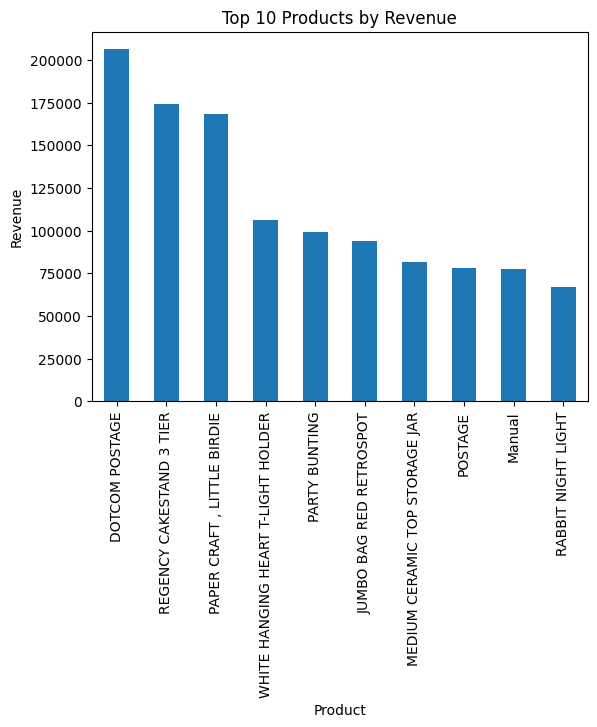

In [14]:
import matplotlib.pyplot as plt

top_products.plot(kind='bar', title='Top 10 Products by Revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.show()


* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [15]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block (553063055.py, line 5)